In [1]:
import numpy as np
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
import random
import time
from math import sqrt  # Importar sqrt desde el módulo math
import matplotlib.pyplot as plt
from Dyna import DynaQPlusAgent

Number of wins in 100 episodes: 44


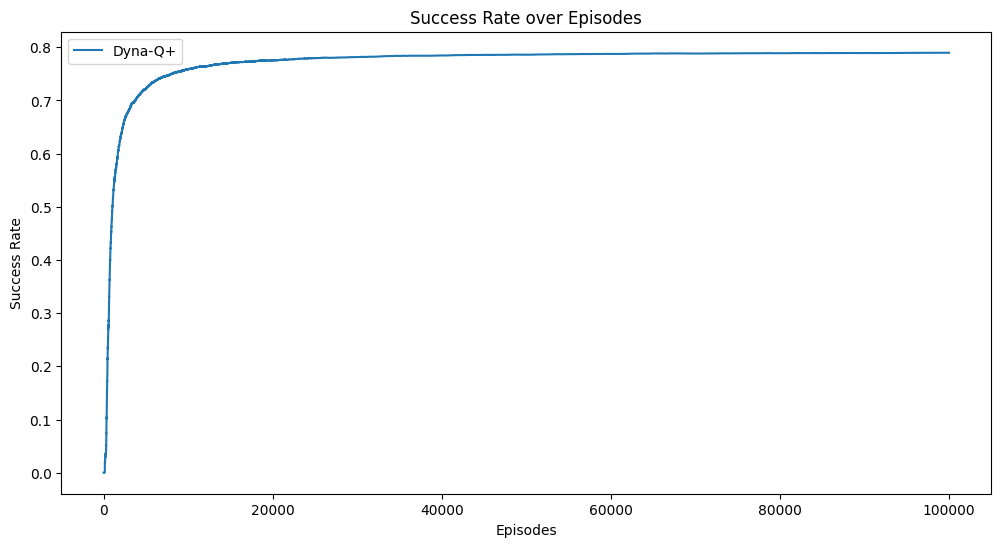

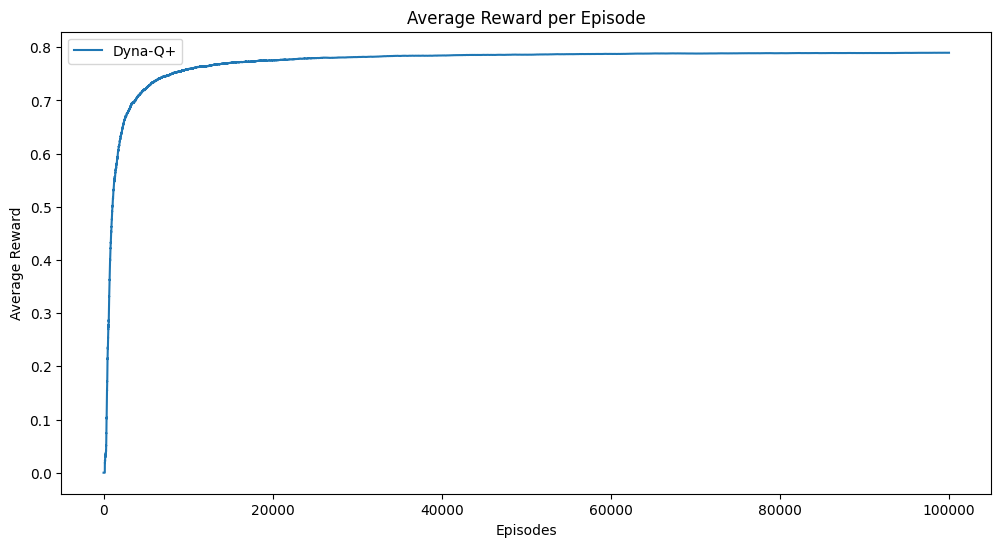

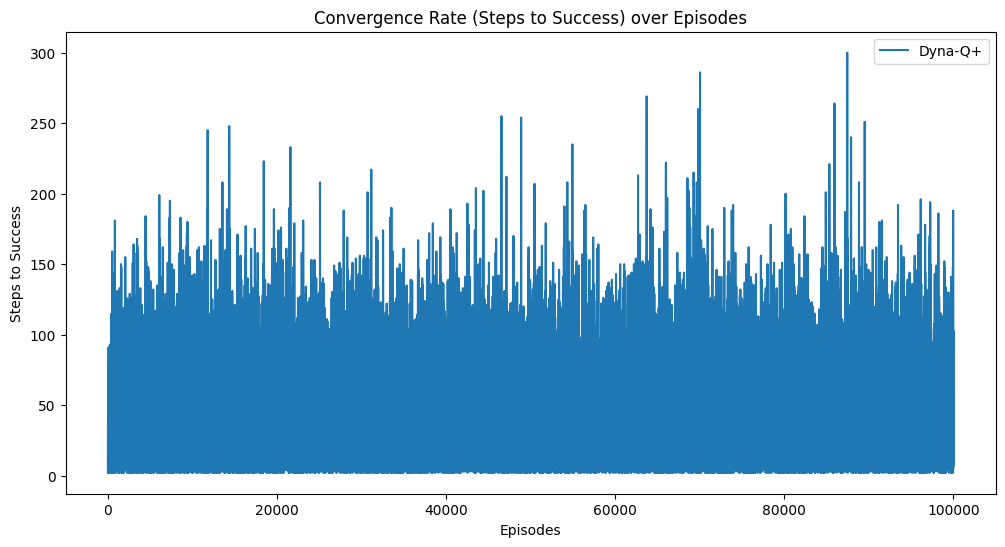

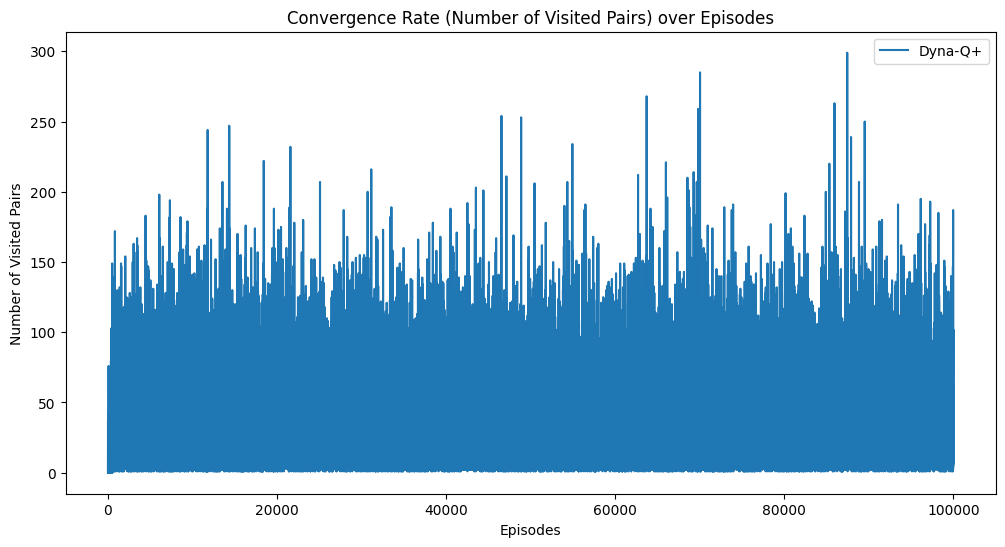

In [2]:
# Crear el entorno de Frozen Lake
desc = generate_random_map(size=4)
env = gym.make("FrozenLake-v1", render_mode=None, desc=desc, is_slippery=True)
env.metadata["render_fps"] = 30

# Crear un agente Dyna-Q+
agent = DynaQPlusAgent(env, alpha=0.1, gamma=0.90, epsilon=0.01, n=10, exploration_bonus=0.01)

# Entrenar al agente
training_episodes = 100000

dyna_success_rates, dyna_avg_rewards, dyna_steps, dyna_visited_pairs = agent.train(training_episodes)

# Probar al agente entrenado
testing_episodes = 100
wins = agent.test(testing_episodes)

env.close()


# Graficar los resultados
episodes = np.arange(1, training_episodes + 1)

# i. Tasa de éxito en los episodios
plt.figure(figsize=(12, 6))
plt.plot(episodes, np.cumsum(dyna_success_rates) / episodes, label="Dyna-Q+")
plt.xlabel("Episodes")
plt.ylabel("Success Rate")
plt.title("Success Rate over Episodes")
plt.legend()
plt.show()

# ii. Recompensa promedio por episodio
plt.figure(figsize=(12, 6))
plt.plot(episodes, np.cumsum(dyna_avg_rewards) / episodes, label="Dyna-Q+")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Average Reward per Episode")
plt.legend()
plt.show()

# iii. Tasa de convergencia
plt.figure(figsize=(12, 6))
plt.plot(episodes, dyna_steps, label="Dyna-Q+")
plt.xlabel("Episodes")
plt.ylabel("Steps to Success")
plt.title("Convergence Rate (Steps to Success) over Episodes")
plt.legend()
plt.show()

# iv. Exploracion
plt.figure(figsize=(12, 6))
plt.plot(episodes, dyna_visited_pairs, label="Dyna-Q+")
plt.xlabel("Episodes")
plt.ylabel("Number of Visited Pairs")
plt.title("Convergence Rate (Number of Visited Pairs) over Episodes")
plt.legend()
plt.show()
